# HW4, problem 1

### Log-barrier method

In [1]:
# primal barrier method from nocedal 19.6
using LinearAlgebra

# an implementation of the primal barrier method.
# this is algorithmic framework 19.5 on page 584.
function barrier(P, ∇P, x, c; μ=1, ϵ=1e-4)
    τ = 1
    while true
        x = steepest_descent_barrier(P, ∇P, x, μ, c, ϵ=τ)
        if norm(μ * B(x)) < ϵ
            return x, μ
        end
        μ = .9*μ
        τ = .9*τ
    end
    
end

# algorithm 3.1 (backtracking line search)
# modified to work with barrier methods
function backtracking_line_search_barrier(f, ∇f, x, μ, c, p)
    α = .5     # initial step length
    rho = 0.75
    ctol = 1e-4

    function stay_feasible(α)
        while c(x + α*p) < 0    # constraint
            α *= rho
        end
        return α
    end
    α = stay_feasible(α)

    while f(x + α*p, μ) > f(x, μ) + ctol*α*transpose(∇f(x, μ))*p 
        α *= rho
        α = stay_feasible(α)
    end
    return α
end

# steepest descent modified to be used with barrier method
function steepest_descent_barrier(f, ∇f, x, μ, c; ϵ=1e-3, k=1, c1=1e-4)
    
    while norm(∇f(x,μ)) > ϵ
        p = -∇f(x,μ)   # steepest descent direction
        
        # determine step size
        α = backtracking_line_search_barrier(f, ∇f, x, μ, c, p)
        x = x + α*p  # the new iterate
    end
    
    return x
end

# solve the problem
# min (x1 + 0.5)^2 + (x2 - 0.5)^2
# s.t. x1 >= 0
f(x) = (x[1]+0.5)^2 + (x[2]-0.5)^2
c(x) = x[1]
B(x) = -log(c(x))
P(x,μ) = f(x) + μ*B(x)
∇P(x,μ) = [ 2*(x[1]+0.5)-μ/x[1], 2*(x[2]-0.5) ]  # need this for steepest descent

x0 = [1,1]   # start at a feasible point
(x,μ) = barrier(P, ∇P, x0, c; μ=1.0)
println("solution occurs near x = ", x)


solution occurs near x = [8.335041398941028e-6, 0.5000000000000041]


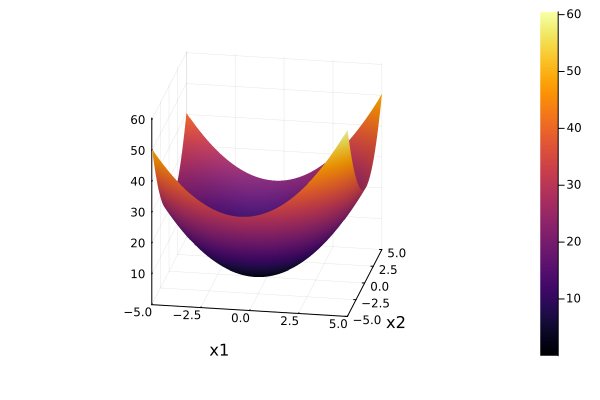

In [2]:
using Plots

f(x1, x2) = (x1+0.5)^2 + (x2-0.5)^2

x1 = range(-5, 5, length=100)
x2 = range(-5, 5, length=100)

plot(surface(x1, x2, f), xlab="x1", ylab="x2", camera=(10,20))

The solution makes sense because the objective function is a paraboloid centered at (-0.5, 0.5). Since we have the constraint x1 >= 0, the minium to our objective function is at (0, 0.5).